In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df.shape

(9134, 24)

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## Analitycs on Engaged Customers
##### We are going to analyze it to understand how different customers behave and react to different marketing strategies.

In [7]:
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

# Visualize this in a bar plot

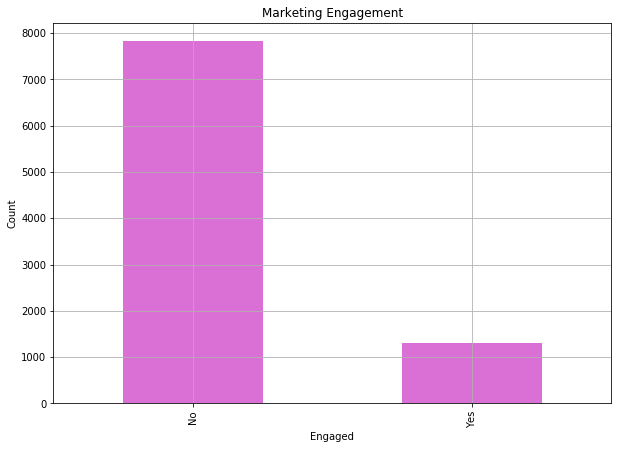

In [8]:
ax = df.groupby('Response').count()['Customer'].plot(
    kind ='bar',
    color ='orchid', 
    grid=True, 
    figsize=(10,7),
    title='Marketing Engagement'
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [9]:
# Calculae the percentages of the engaged and non-engaged customers
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

### Hanya 14% yang merespon via telepon

In [10]:
# Get the engaged rates per renewal offer type
by_offer_type_df = df.loc[
    df['Response'] == 'Yes', #count only engaged cutomers
].groupby([
    'Renew Offer Type' # engaged cutomers grouped by renewal offer type
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

## Visualize it in a bar plot

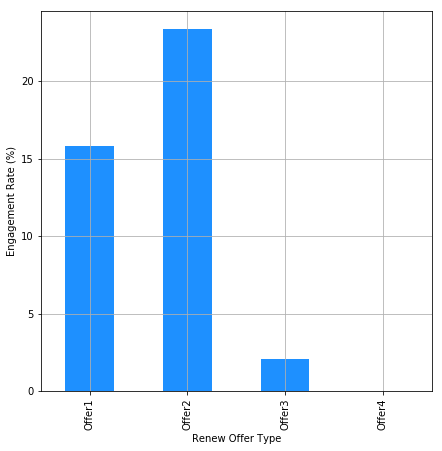

In [11]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(7,7),
    color='dodgerblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

###### As we can see, Offer2 had the highest engagement rate among the customers

###### 2.3 - Offer Type & Vehicle Class

###### We are going to understand how customers with different attributes respond differently to different marketing messages. We start looking at the engagements rates by each offer type and vehicle class.

In [16]:
df_offer_type_df = df.loc[
    df['Response'] == 'Yes' # engaged customers
].groupby([
    'Renew Offer Type', 'Vehicle Class' # grouping the data by these two columns
]).count()['Customer']

df.groupby('Renew Offer Type').count()['Customer'] # rates f

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

In [17]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

AttributeError: 'Index' object has no attribute 'remove_unused_levels'